#  IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

// The first step is to import the librarys for data analysis. numpy is for numerical operations,pandas is for data manipulation and analysis,warning is a built in function it manages warnings while execution,seaborn is for data visualization.

##  MOUNTING THE GOOGLE DRIVE

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## IMPORTING THE CSV FILE

In [3]:
df= pd.read_csv('/content/drive/My Drive/Housing.csv.xls')

// 'df' is a variable,pd is to read the data from the spacified file,read_csv() it is a function from pandas,/content/drive/My Drive/Housing.csv.xls it is the path to access the file.

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


// I used .head() to show the first 5 rows of data present in the file.

In [5]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


// I used .tail() to show the last 5 rows of data present in the file it works same like .head()

## **DESCRIBING THE INFO**

In [9]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


// .describe is used to COUNT the data values inculuding the mean, median, mode, standard deviation.




In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


// .info() is used to provide column details and the type of data is used and also the memory storage.

In [7]:
df.shape

(545, 13)

// .shape is used for knowing how many rows and columns are present.

In [8]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

// .columns is used to know the names of field names or columns names.

In [10]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


// .isnull() is check wether there are any null values present in the file if we use .sum() we can see the how many values are null.

## **CHECKING THE UNIQUE VALUES**

In [11]:
df.nunique()

,0
price,219
area,284
bedrooms,6
bathrooms,4
stories,4
mainroad,2
guestroom,2
basement,2
hotwaterheating,2
airconditioning,2


//.nunique is used for find how many unique values are present inside the every column.



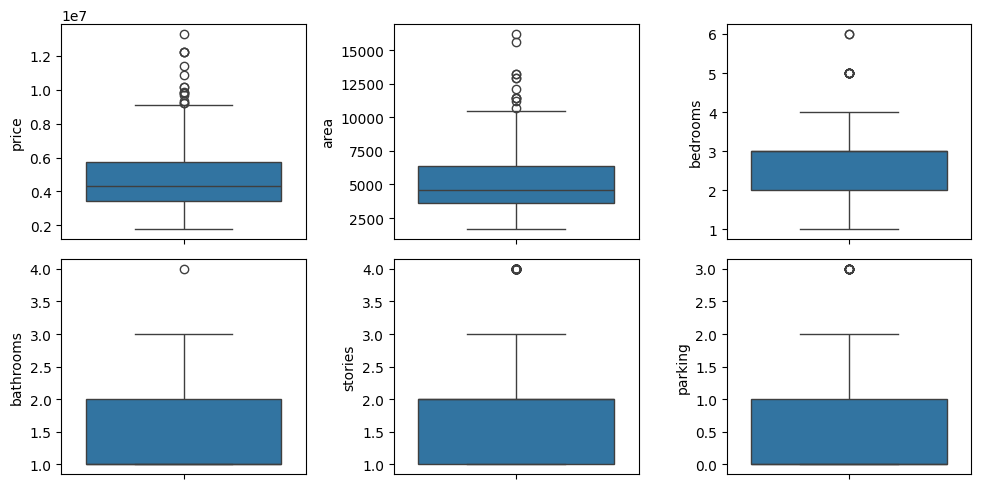

In [12]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])
plt.tight_layout()

//  Price and area have considerable outliers. We can drop the outliers as we have sufficient data.

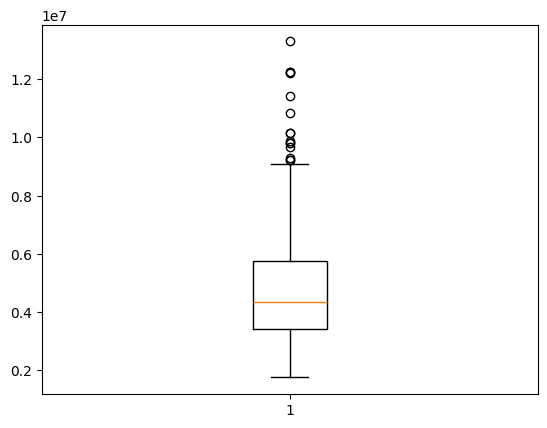

In [13]:
plt.boxplot(df.price)
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
housing = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

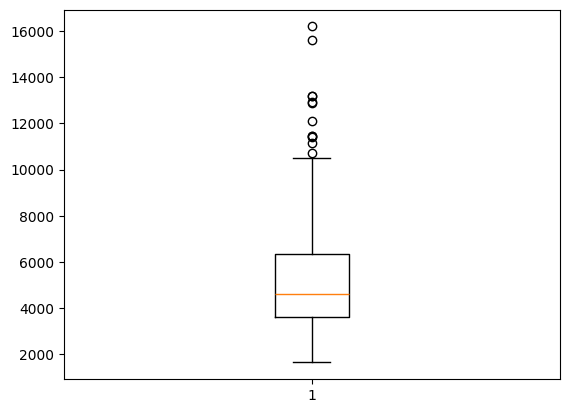

In [14]:
plt.boxplot(df.area)
Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]

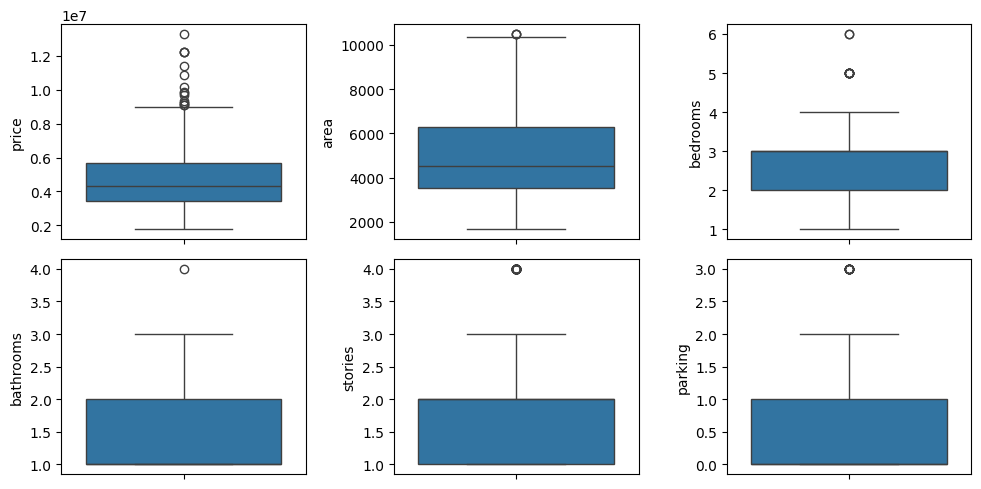

In [15]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

# **EXPLORATORY DATA ANALYTICS**

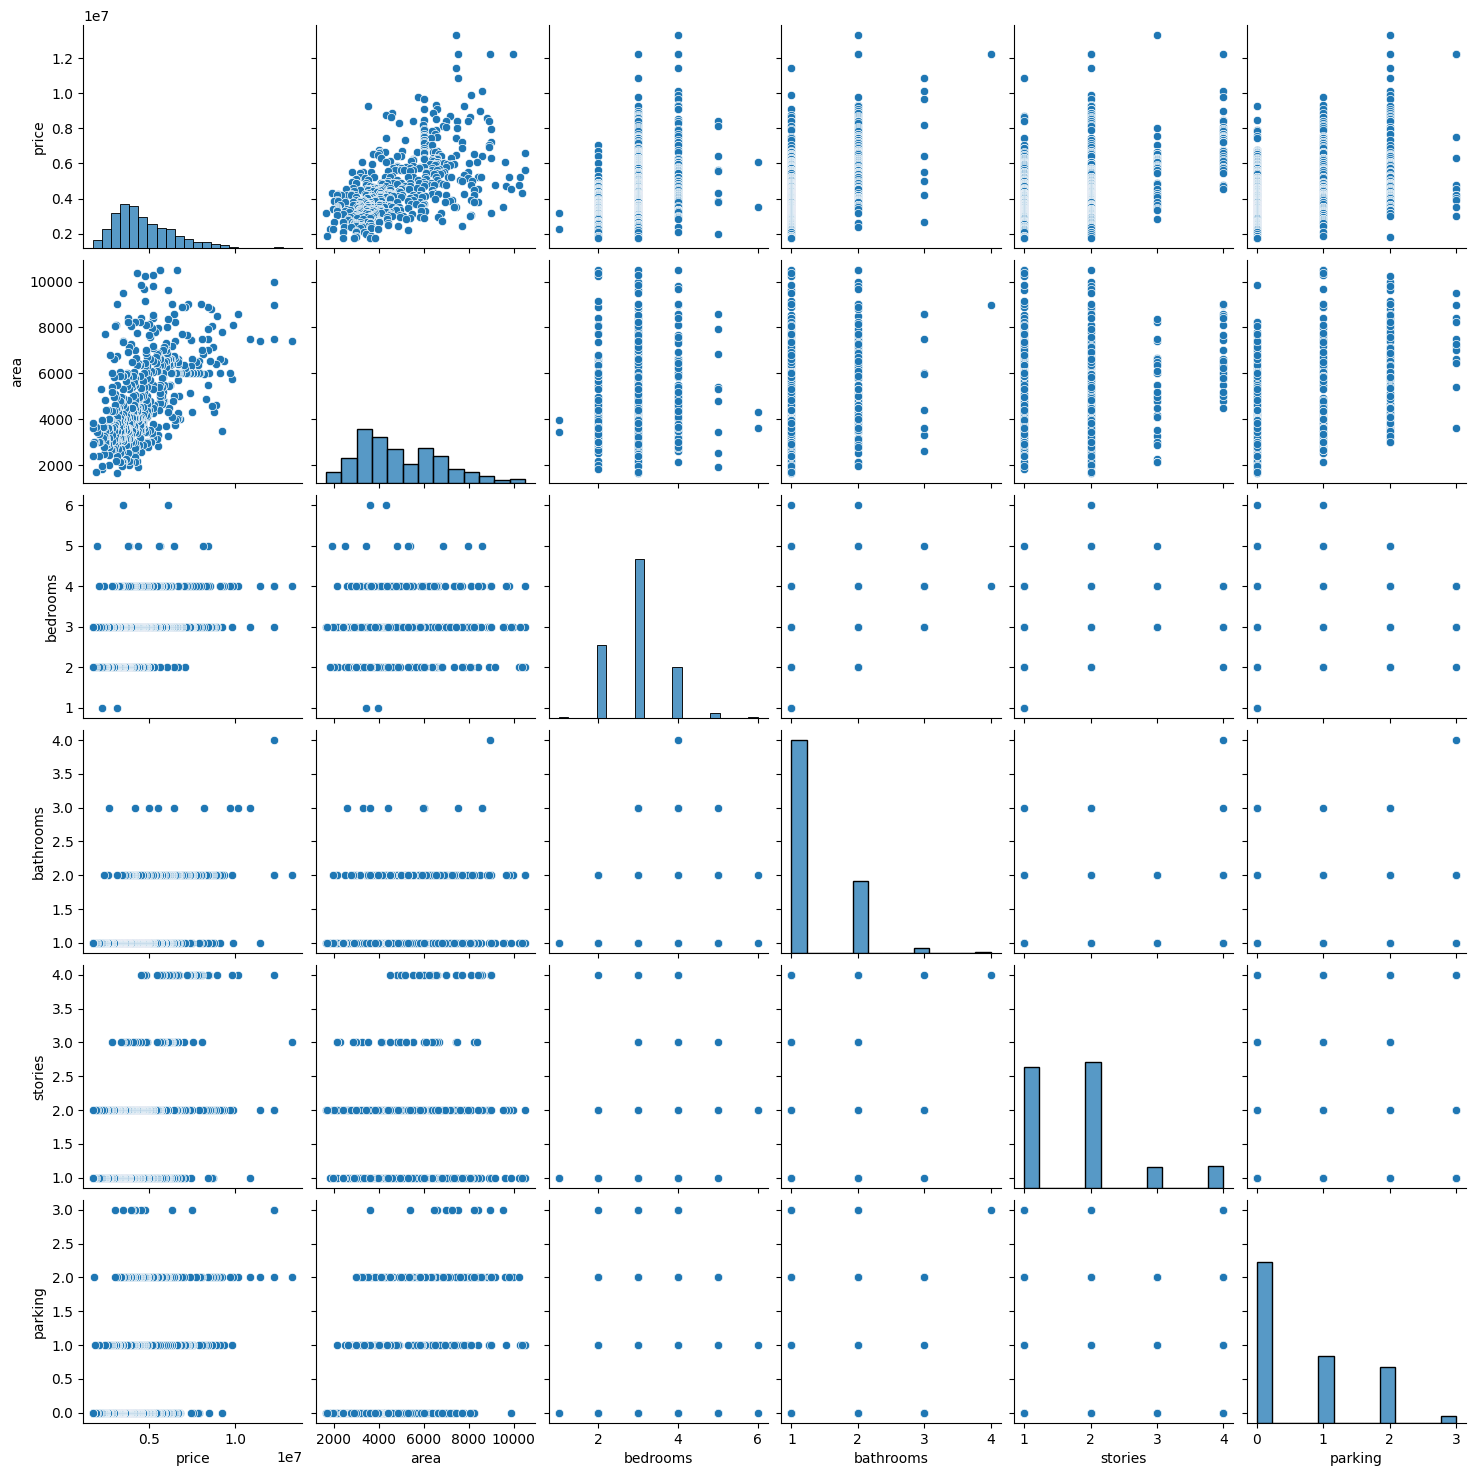

In [16]:
sns.pairplot(df)
plt.show()

//  Visualising Numeric Variables.

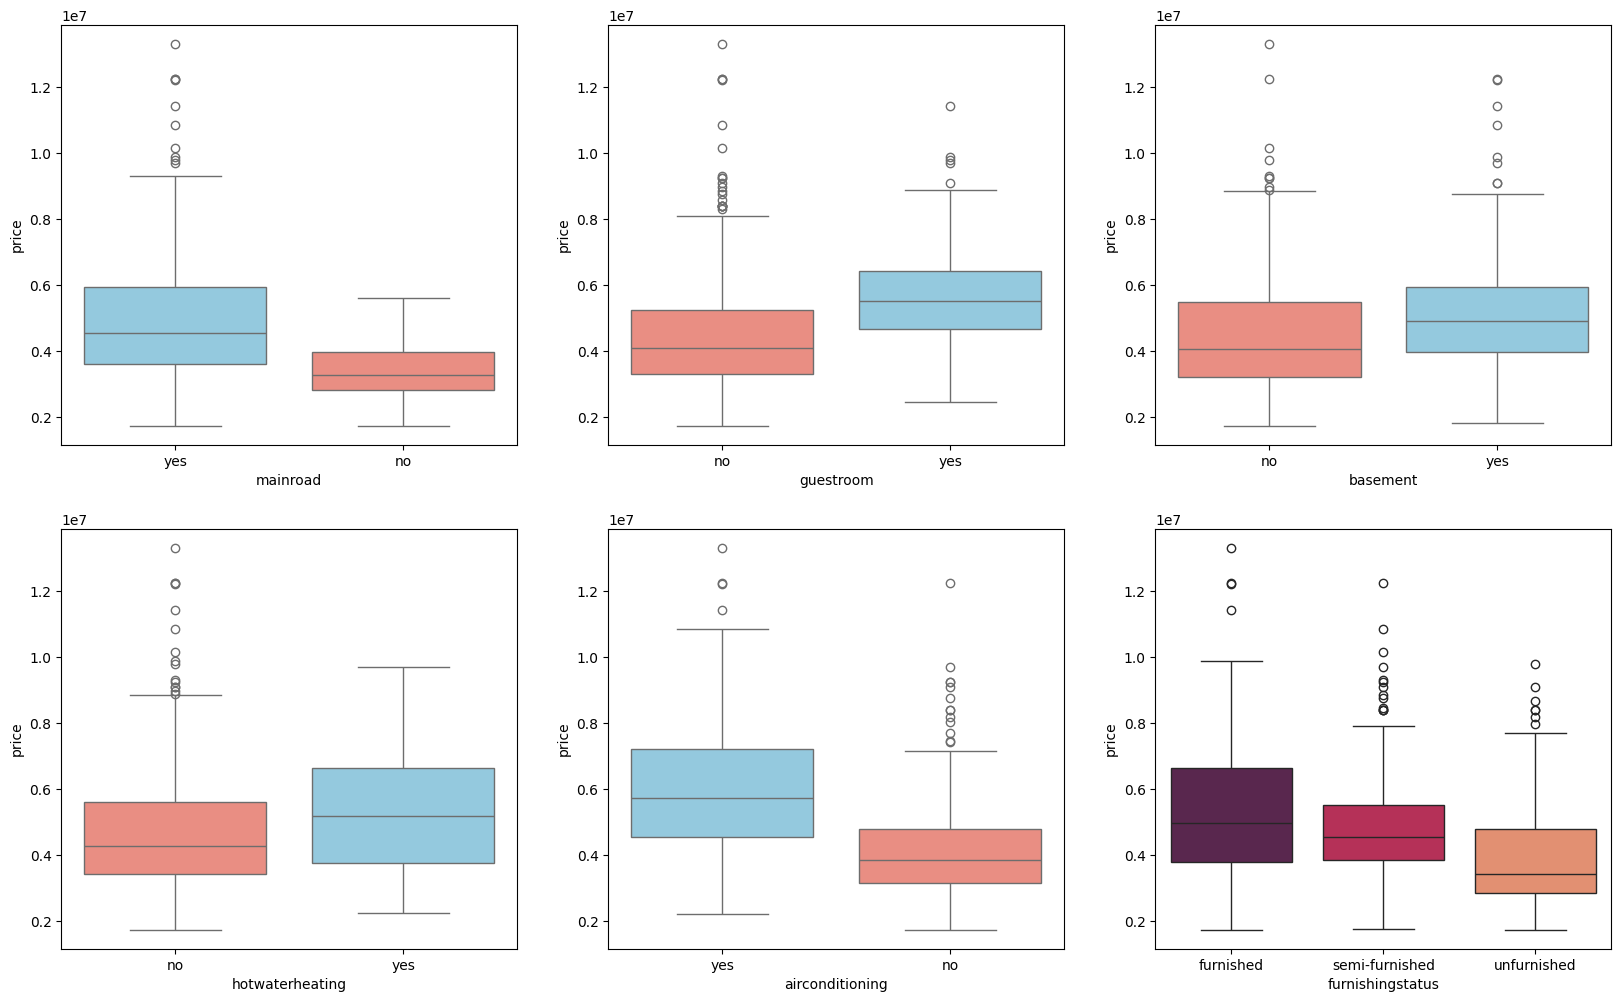

In [17]:
plt.figure(figsize=(20, 12))

# Define a custom palette for 'yes' and 'no'
custom_palette = {'yes': 'skyblue', 'no': 'salmon'}

plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = df, palette=custom_palette)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = df, palette=custom_palette)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = df, palette=custom_palette)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = df, palette=custom_palette)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = df, palette=custom_palette)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = df, palette='rocket') # Keep original palette for this one
plt.show()

//  Visualising Categorical Variables.

//  We can also visualise some of these categorical features parallely by using the hue argument. Below is the plot for furnishingstatus with airconditioning as the hue.

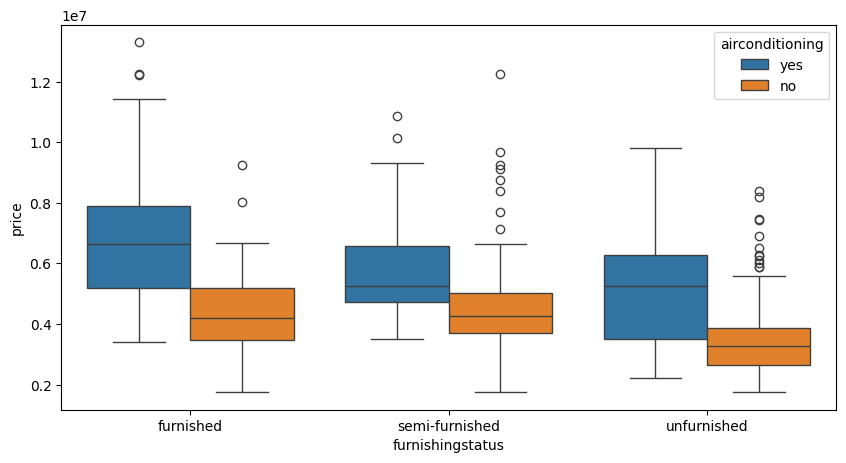

In [18]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = df)
plt.show()

## **DATA PREPARATION**

In [19]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, "no": 0})

housing[varlist] = housing[varlist].apply(binary_map)
display(housing.head())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


# **DUMMY VARIABLES**

In [20]:
status = pd.get_dummies(housing['furnishingstatus'])

In [21]:
status.head()

,furnished,semi-furnished,unfurnished
15,False,True,False
16,False,False,True
17,True,False,False
18,True,False,False
19,False,True,False


//  In this code snippet retrieves and displays the rows with index labels 15 through 19 from your status DataFrame, allowing you to inspect the one-hot encoded values for these specific data points.

In [22]:
status = pd.get_dummies(df['furnishingstatus'], drop_first = True)

In [59]:
 df= df.drop('furnishingstatus', axis=1)
status = status.astype(int)
df = pd.concat([housing, status], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000.0,6000.0,4.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,semi-furnished,1.0,0.0
16,9100000.0,6600.0,4.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,unfurnished,0.0,1.0
17,8960000.0,8500.0,3.0,2.0,4.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,furnished,0.0,0.0
18,8890000.0,4600.0,3.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,furnished,0.0,0.0
19,8855000.0,6420.0,3.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,semi-furnished,1.0,0.0


//  The variable furnishingstatus has three levels. We need to convert these levels into integer as well.For this, we will use something called dummy variables.

## **SPLITTING THE DATA INTO TRAINING AND TESTING SETS**

In [24]:
from sklearn.model_selection import train_test_split
import numpy as np
housing.dropna(inplace=True)
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

//. A crucial data preparation step that cleans your main dataset by removing missing values and then divides it into separate sets for training your model (df_train) and evaluating its performance (df_test), ensuring reproducibility of the split

## **RESCALING THE FEATURES USING MINMAX SCALING**

In [25]:
from sklearn.preprocessing import MinMaxScaler

//. The MinMaxScaler is a data scaling technique. Scaling, also known as feature scaling or standardization, is a preprocessing step used to normalize the range of independent variables or features of data. In this case, MinMaxScaler scales features to a given range, usually between 0 and 1. This is particularly useful for algorithms that are sensitive to the magnitude of features, such as gradient descent-based algorithms or distance-based algorithms like K-Nearest Neighbors.

In [26]:
scaler = MinMaxScaler()

In [27]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [28]:
display(df_train.head())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
48,0.776190,0.189964,0.4,0.5,0.333333,1,0,1,0,0,0.333333,0,unfurnished
465,0.176190,0.154122,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,unfurnished
144,0.523810,0.218638,0.6,0.0,0.333333,1,1,1,0,1,0.333333,0,furnished
395,0.238095,0.139785,1.0,0.0,0.333333,1,0,0,0,0,0.333333,0,unfurnished
254,0.371429,0.205018,0.6,0.0,0.333333,1,0,0,0,1,0.666667,0,semi-furnished


//   The purpose of displaying the head of df_train at this point is to allow you to quickly inspect the data after the MinMaxScaler has been applied in the preceding cell.

In [29]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,0.386021,0.241122,0.389757,0.125337,0.261456,0.846361,0.172507,0.350404,0.048518,0.309973,0.219227,0.210243
std,0.212167,0.143626,0.144831,0.226142,0.277672,0.361089,0.378331,0.477741,0.215147,0.463107,0.282378,0.408031
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.238095,0.136559,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.342857,0.204301,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.523810,0.327957,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


//  The purpose of displaying the descriptive statistics at this point is to allow you to examine the distribution and summary of your data after scaling.

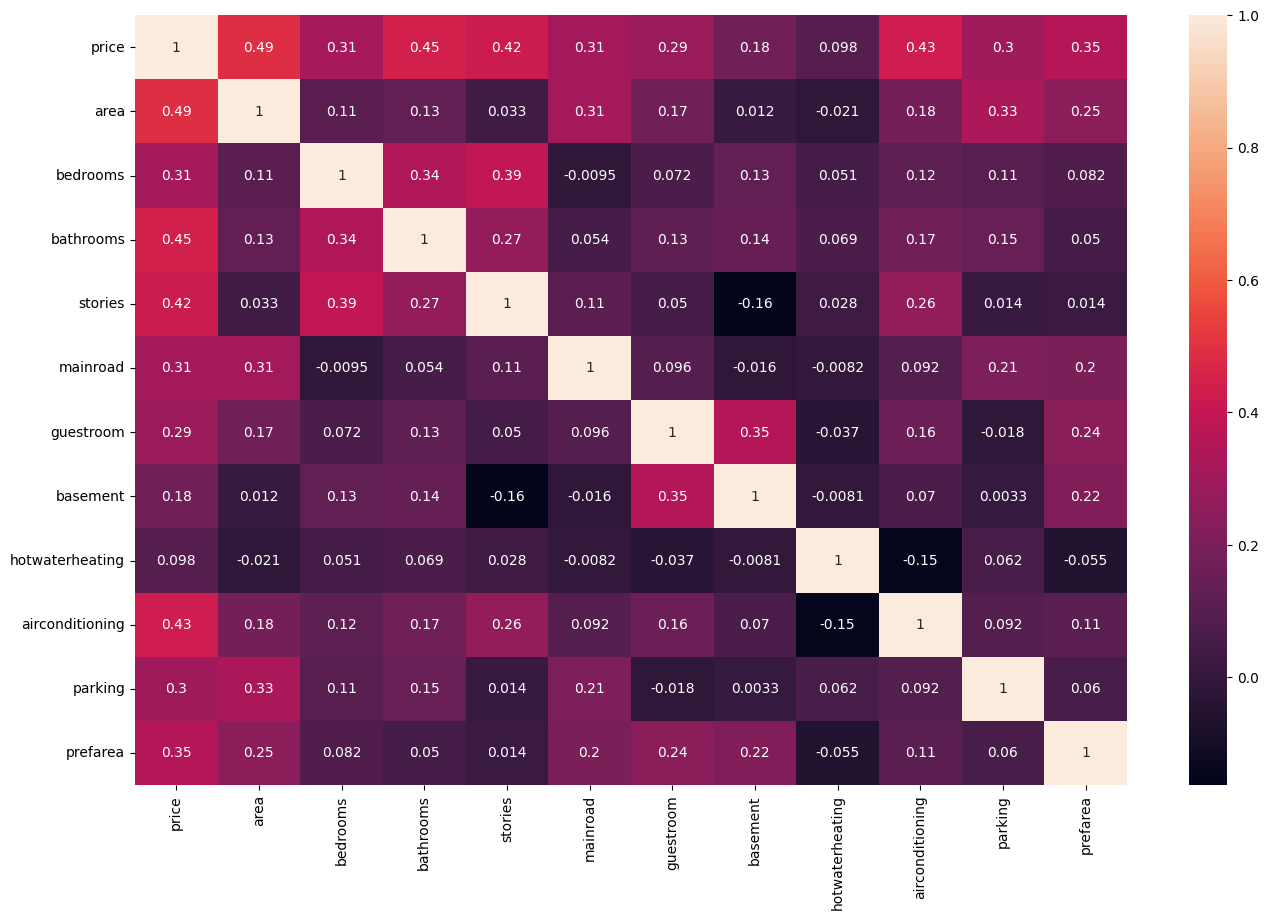

In [30]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.drop('furnishingstatus', axis=1).corr(), annot = True, cmap="rocket")
plt.show()

## **DIVIDING INTO X AND Y SETS FOR THE MODEL BUILDING**

In [32]:
y_train = df_train.pop('price')
X_train = df_train

## **MODEL BUILDING**

In [33]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [34]:
lm = LinearRegression()
lm.fit(X_train.dropna().drop('furnishingstatus', axis=1), y_train.dropna())

LinearRegression()

In [35]:
rfe = RFE(estimator=lm, n_features_to_select=6)
rfe = rfe.fit(X_train.drop('furnishingstatus', axis=1), y_train)

In [36]:
display(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))

[('area', np.True_, np.int64(1)),
 ('bedrooms', np.False_, np.int64(6)),
 ('bathrooms', np.True_, np.int64(1)),
 ('stories', np.True_, np.int64(1)),
 ('mainroad', np.False_, np.int64(4)),
 ('guestroom', np.False_, np.int64(5)),
 ('basement', np.False_, np.int64(3)),
 ('hotwaterheating', np.True_, np.int64(1)),
 ('airconditioning', np.True_, np.int64(1)),
 ('parking', np.False_, np.int64(2)),
 ('prefarea', np.True_, np.int64(1))]

In [37]:
col = X_train.drop('furnishingstatus', axis=1).columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'hotwaterheating', 'airconditioning',
       'prefarea'],
      dtype='object')

In [38]:
X_train.drop('furnishingstatus', axis=1).columns[~rfe.support_]

Index(['bedrooms', 'mainroad', 'guestroom', 'basement', 'parking'], dtype='object')

## **BUILDING MODEL**

In [39]:
X_train_rfe = X_train[col]

In [40]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [41]:
X_train_rfe = X_train_rfe.astype(float)
lm = sm.OLS(y_train,X_train_rfe).fit()

In [42]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     90.72
Date:                Fri, 25 Jul 2025   Prob (F-statistic):           3.19e-69
Time:                        11:56:24   Log-Likelihood:                 218.90
No. Observations:                 371   AIC:                            -423.8
Df Residuals:                     364   BIC:                            -396.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1123      0.015      7.357      0.000       0.082       0.142
area                0.5111      0.052      9.905      0.000       0.410       0.613
bathrooms           0.2483      0.033      7.557      0.000       0.184       0.313
stories             0.2033      0.027      7.489      0.000       0.150       0.257
hotwaterheating     0.1277      0.033      3.832      0.000       0.062       0.193
airconditioning     0.1128      0.016      6.897      0.000       0.081       0.145
prefarea            0.1190      0.018      6.657      0.000       0.084       0.154
==============================================================================
Omnibus:                       71.471   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.315
Skew:                           0.996   Prob(JB):                     5.11e-34
Kurtosis:                       5.439   Cond. No.                         8.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
vi = pd.DataFrame()
X = X_train_rfe
vi['Features'] = X.columns
vi['VI'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vi['VI'] = round(vi['VI'], 2)
vi = vi.sort_values(by = "VI", ascending = False)
vi

,Features,VI
0,const,4.72
5,airconditioning,1.16
3,stories,1.15
2,bathrooms,1.11
1,area,1.11
6,prefarea,1.07
4,hotwaterheating,1.04


## **RESIDUAL ANALYSIS OF THE TRAIN DATA**

In [45]:
y_train_price = lm.predict(X_train_rfe)

In [46]:
res = (y_train_price - y_train)

In [47]:
%matplotlib inline

Text(0.5, 0, 'Errors')

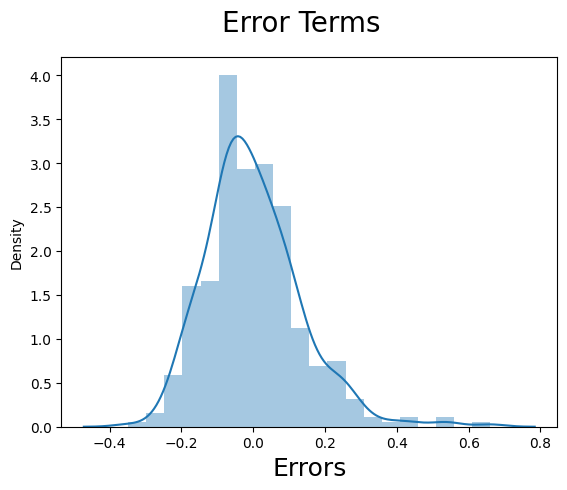

In [48]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

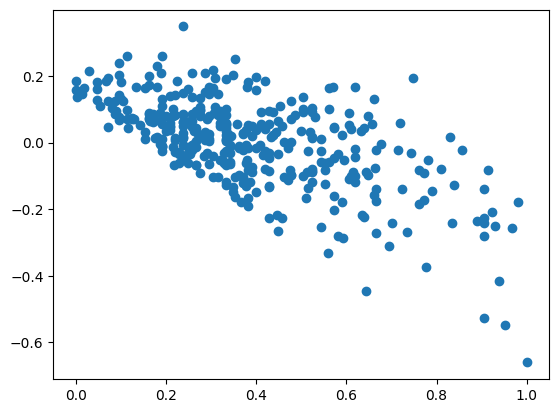

In [49]:
plt.scatter(y_train,res)
plt.show()

//  There may be some relation in the error terms.

## **MODEL EVALUATION**

In [50]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']

In [51]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

## **DIVIDING INTO X_TEST AND Y_TEST**

In [52]:
y_test = df_test.pop('price')
X_test = df_test

In [53]:
X_test = sm.add_constant(X_test)

In [54]:
X_test_rfe = X_test[X_train_rfe.columns]

In [55]:
y_pred = lm.predict(X_test_rfe)

In [57]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5832154960181067

In [56]:
print("Columns in X_train_rfe:")
display(X_train_rfe.columns)
print("\nColumns in X_test_rfe:")
display(X_test_rfe.columns)

Columns in X_train_rfe:


Index(['const', 'area', 'bathrooms', 'stories', 'hotwaterheating',
       'airconditioning', 'prefarea'],
      dtype='object')


Columns in X_test_rfe:


Index(['const', 'area', 'bathrooms', 'stories', 'hotwaterheating',
       'airconditioning', 'prefarea'],
      dtype='object')

Text(0, 0.5, 'y_pred')

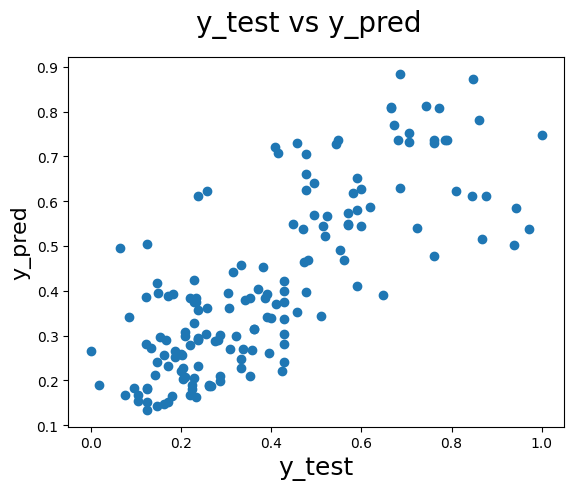

In [58]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

//  If the model's predictions were perfect, all the points would lie exactly on a diagonal line (where y_test equals y_pred).
Points that are close to this diagonal line indicate good predictions.
Points that are far away from the diagonal line represent predictions where the model significantly overestimated or underestimated the actual price.
